In [30]:
import seaborn as sns

In [58]:
import pandas as pd

df_final = pd.read_csv("./data/df_final.csv")

In [59]:
df_final = df_final.rename(columns = {'human_success':'Humans', 'bert_00success':'BERT', 'mnli_00success':'BART MNLI'})

# 1. know about logic 

In [73]:
df1 = df_final[['Humans','BERT', 'BART MNLI']].mean()
df1 = df1.to_frame().reset_index()
df1.columns=["Algo",'Success Rate']
new_row = {'Algo':'Random', 'Success Rate':0.125}
#append row to the dataframe
df1 = df1.append(new_row, ignore_index=True).sort_values(by='Success Rate')
df1

,Algo,Success Rate
3,Random,0.125000
1,BERT,0.191517
0,Humans,0.451417
2,BART MNLI,0.495131


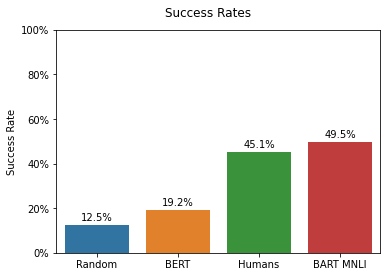

In [77]:
x = df1["Algo"]
y = df1["Success Rate"]

import matplotlib.ticker as mtick
ax  = sns.barplot(data=df1, x=x, y = y)
ax.figure.suptitle("Success Rates")
ax.figure.subplots_adjust(left=0.15, top=0.9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylim(0,1)
ax.set_xlabel('')

for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.1%'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


# 2. Same logic?

## Same result

In [10]:
df_final["same_BERT"] = df_final["human_success"] + df_final["bert_00success"]
df_final["same_BART_MNLI"] = df_final["human_success"] + df_final["mnli_00success"]

In [13]:
df_final.shape

(4621, 13)

In [14]:
df_final["same_BERT"].value_counts()/4621

0    0.480848
1    0.395369
2    0.123783
Name: same_BERT, dtype: float64

In [15]:
df_final["same_BART_MNLI"].value_counts()/4621

0    0.353820
1    0.345813
2    0.300368
Name: same_BART_MNLI, dtype: float64

In [78]:
random_success= 0.451417*0.125
random_fail = (1-0.451417)*(1-0.125)
random_differ = 1 - (random_success+random_fail)


print(random_success, random_fail, random_differ)

0.056427125 0.48001012500000007 0.4635627499999999


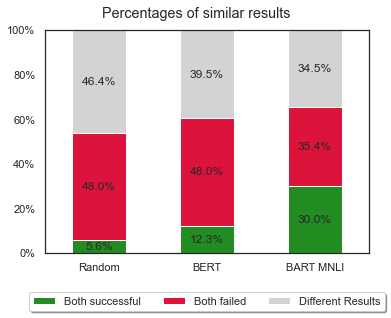

In [146]:
# create DataFrame
import matplotlib.pyplot as plt
df = pd.DataFrame({'Both successful': [0.0564, 0.123, 0.300],
                   'Both failed': [0.480, 0.480, 0.3538],
                   'Different Results': [0.4636, 0.3953, 0.345]},
                  index=['Random', 'BERT', 'BART MNLI'])
 
 
sns.set(style='white')
# create stacked bar chart for monthly temperatures
ax = df.plot(kind='bar', stacked=True, color=['forestgreen', 'crimson', 'lightgray'])
ax.figure.suptitle("Percentages of similar results")
ax.figure.subplots_adjust(left=0.15, top=0.9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylim(0,1)
ax.set_xlabel('')
ax.xaxis.set_tick_params(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1%}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
# for bar in ax.patches:
   

#   # Using Matplotlib's annotate function and
#   # passing the coordinates where the annotation shall be done
#   # x-coordinate: bar.get_x() + bar.get_width() / 2
#   # y-coordinate: bar.get_height()
#   # free space to be left to make graph pleasing: (0, 8)
#   # ha and va stand for the horizontal and vertical alignment
#     ax.annotate(format(bar.get_height(), '.1%'),
#                    (bar.get_x() + bar.get_width() / 2,
#                     bar.get_height()), ha='center', va='center',
#                    size=10, xytext=(0, 8),
#                    textcoords='offset points')


## Same answer

In [16]:
df_final.columns

Index(['human_response_index', 'human_success', 'best_bert_00_index',
       'bert_00success', 'best_mnli_00_index', 'mnli_00success', 'task_form',
       'implicatur', 'mode', 'signe', 'absurde', 'same_BERT',
       'same_BART_MNLI'],
      dtype='object')

In [19]:
df_final["same_answer_BERT"] =  df_final[["human_response_index","best_bert_00_index"]].apply(lambda x: 1 if x[0] == x[1] else 0 ,axis =1 )
df_final["same_answer_BART_MNLI"] =  df_final[["human_response_index","best_mnli_00_index"]].apply(lambda x: 1 if x[0] == x[1] else 0 ,axis =1 )

In [22]:
df_final[["same_answer_BERT","human_success" ]].groupby(["human_success","same_answer_BERT"]).size()/4621

human_success  same_answer_BERT
0              0                   0.495347
               1                   0.053235
1              0                   0.361826
               1                   0.089591
dtype: float64

In [23]:
df_final[["same_answer_BART_MNLI","human_success" ]].groupby(["human_success","same_answer_BART_MNLI"]).size()/4621

human_success  same_answer_BART_MNLI
0              0                        0.460074
               1                        0.088509
1              0                        0.254490
               1                        0.196927
dtype: float64

# Specific

In [24]:
df_final.columns

Index(['human_response_index', 'human_success', 'best_bert_00_index',
       'bert_00success', 'best_mnli_00_index', 'mnli_00success', 'task_form',
       'implicatur', 'mode', 'signe', 'absurde', 'same_BERT', 'same_BART_MNLI',
       'same_answer_BART_MNLI', 'same_answer_BERT'],
      dtype='object')

## signe

In [96]:
df_final.columns

Index(['human_response_index', 'Humans', 'best_bert_00_index', 'BERT',
       'best_mnli_00_index', 'BART MNLI', 'task_form', 'implicatur', 'mode',
       'signe', 'absurde'],
      dtype='object')

In [110]:
df_signe = df_final[['Humans','BERT', 'BART MNLI','signe']].groupby("signe").mean()
df_signe = df_signe.transpose()
df_signe

signe,negatif,positif
Humans,0.388435,0.631579
BERT,0.049942,0.596491
BART MNLI,0.482769,0.530493


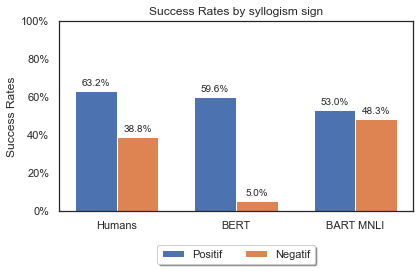

In [145]:
import matplotlib.ticker as mtick
import numpy as np

x = np.arange(3)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_signe.positif, width, label='Positif')
rects2 = ax.bar(x + width/2, df_signe.negatif, width, label='Negatif')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Rates')
ax.set_title('Success Rates by syllogism sign')
ax.figure.subplots_adjust(left=0.15, top=0.9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylim(0,1)
ax.set_xlabel('')
ax.set_xticks(x, df_signe.index)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.1%'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

fig.tight_layout()

plt.show()




In [ ]:
df

,Both successful,Both failed,Different Result
Random,0.0564,0.4800,0.4636
BERT,0.1230,0.4800,0.3953
BART MNLI,0.3000,0.3538,0.3450


## mode

In [116]:
df_mode = df_final[['Humans','BERT', 'BART MNLI','mode']].groupby("mode").mean()
df_mode = df_mode.transpose()
df_mode


mode,particulier,universel
Humans,0.412194,0.508502
BERT,0.224169,0.143996
BART MNLI,0.496532,0.493092


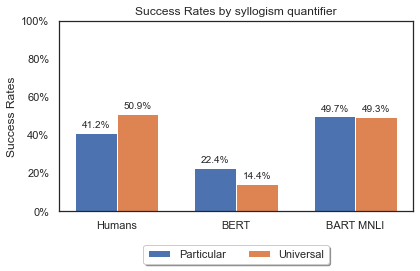

In [144]:
import matplotlib.ticker as mtick
import numpy as np

x = np.arange(3)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_mode.particulier, width, label='Particular')
rects2 = ax.bar(x + width/2, df_mode.universel, width, label='Universal')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Rates')
ax.set_title('Success Rates by syllogism quantifier')
ax.figure.subplots_adjust(left=0.15, top=0.9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylim(0,1)
ax.set_xlabel('')
ax.set_xticks(x, df_mode.index)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.1%'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

fig.tight_layout()

plt.show()


## implicatur

In [126]:
df_impl = df_final[['Humans','BERT', 'BART MNLI','implicatur']].groupby("implicatur").mean()
df_impl = df_impl.transpose()
df_impl.columns = ['Other Syllogisms', 'Implicatur']
df_impl

,Other Syllogisms,Implicatur
Humans,0.519649,0.150877
BERT,0.227297,0.033918
BART MNLI,0.607276,0.001170


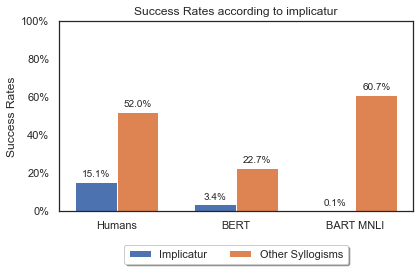

In [143]:
import matplotlib.ticker as mtick
import numpy as np

x = np.arange(3)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_impl['Implicatur'], width, label='Implicatur')
rects2 = ax.bar(x + width/2, df_impl['Other Syllogisms'], width, label='Other Syllogisms')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Rates')
ax.set_title('Success Rates according to implicatur')
ax.figure.subplots_adjust(left=0.15, top=0.9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylim(0,1)
ax.set_xlabel('')
ax.set_xticks(x, df_impl.index)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.1%'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

fig.tight_layout()

plt.show()


## Absurd

In [134]:
df_absurd = df_final[['Humans','BERT', 'BART MNLI','absurde']].groupby("absurde").mean()
df_absurd = df_absurd.transpose()
df_absurd.columns = ['Other Syllogisms', 'reductio ad absurdum']
df_absurd

,Other Syllogisms,reductio ad absurdum
Humans,0.455539,0.427737
BERT,0.195122,0.170803
BART MNLI,0.432165,0.856934


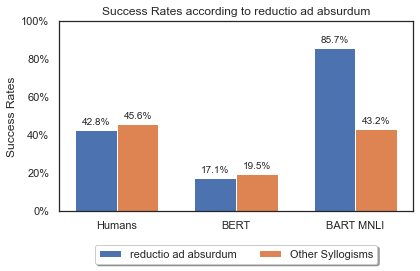

In [142]:
import matplotlib.ticker as mtick
import numpy as np

x = np.arange(3)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_absurd['reductio ad absurdum'], width, label='reductio ad absurdum')
rects2 = ax.bar(x + width/2, df_absurd['Other Syllogisms'], width, label='Other Syllogisms')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Rates')
ax.set_title('Success Rates according to reductio ad absurdum')
ax.figure.subplots_adjust(left=0.15, top=0.9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylim(0,1)
ax.set_xlabel('')
ax.set_xticks(x, df_absurd.index)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.1%'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

fig.tight_layout()

plt.show()

# Reponse type